In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
# import plotly.plotly as py
# from plotly.graph_objs import *

In [2]:
df = pd.read_excel("C:/Users/Phil-Jon-D/Desktop/AY 2017-18/DWDM/Samples/CardiologyCategorical.xls")

In [3]:
df.head()

,age,sex,chest pain type,blood pressure,cholesterol,Fasting blood sugar <120,resting ecg,maximum heart rate,angina,peak,slope,#colored vessels,thal,class
0,60,Male,Asymptomatic,130,206,False,Hyp,132,True,2.4,Flat,2,Rev,Sick
1,49,Male,Abnormal Angina,130,266,False,Normal,171,False,0.6,Up,0,Normal,Healthy
2,64,Male,Angina,110,211,False,Hyp,144,True,1.8,Flat,0,Normal,Healthy
3,63,Male,Asymptomatic,130,254,False,Hyp,147,False,1.4,Flat,1,Rev,Sick
4,53,Male,Asymptomatic,140,203,True,Hyp,155,True,3.1,Down,0,Rev,Sick


In [29]:
#Select columns and place them into X

X= df.iloc[:,[3,7]].values

In [6]:
df.columns

Index(['age', 'sex', 'chest pain type', 'blood pressure', 'cholesterol',
       'Fasting blood sugar <120', 'resting ecg', 'maximum heart rate',
       'angina', 'peak', 'slope', '#colored vessels', 'thal', 'class'],
      dtype='object')

In [7]:
df.dtypes

age                           int64
sex                          object
chest pain type              object
blood pressure                int64
cholesterol                   int64
Fasting blood sugar <120       bool
resting ecg                  object
maximum heart rate            int64
angina                         bool
peak                        float64
slope                        object
#colored vessels              int64
thal                         object
class                        object
dtype: object

# Using the elbow method to determine the optimal number of clusters for k-means clustering

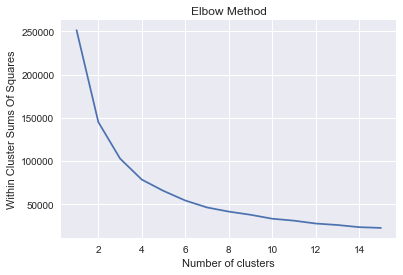

In [30]:
# Import the kmeans clustering model.
from sklearn.cluster import KMeans
wcss= []
for i in  range(1,16):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,16),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sums Of Squares')
plt.show()

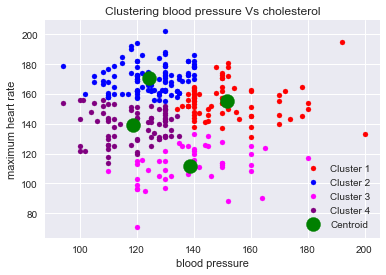

In [31]:
kmeans= KMeans(n_clusters=4, init='k-means++', random_state=0)
y = kmeans.fit_predict(X)

# plot the 4 clusters 
plt.scatter(X[y == 0,0], X[y == 0,1], s= 25, c= 'red', label='Cluster 1')
plt.scatter(X[y == 1,0], X[y == 1,1], s= 25, c= 'blue', label='Cluster 2')
plt.scatter(X[y == 2,0], X[y == 2,1], s= 25, c= 'magenta', label='Cluster 3')
plt.scatter(X[y == 3,0], X[y == 3,1], s= 25, c= 'purple', label='Cluster 4')

# figure out the centrods of each clusters 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s= 200, c='green', label='Centroid')
plt.title('Clustering blood pressure Vs cholesterol')
plt.xlabel('blood pressure')
plt.ylabel('maximum heart rate')
plt.legend()
plt.show()

# Expectation–Maximization

In [32]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

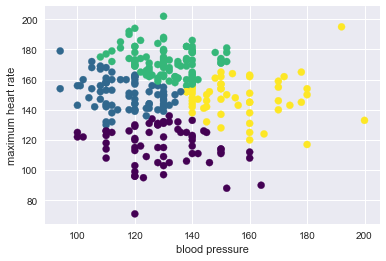

In [33]:
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');
plt.xlabel('blood pressure')
plt.ylabel('maximum heart rate')
plt.show()

# E–M procedure is guaranteed to improve the result in each step

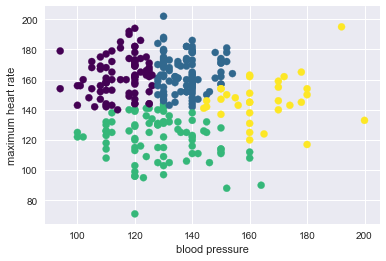

In [14]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');
plt.xlabel('blood pressure')
plt.ylabel('maximum heart rate')
plt.show()

# So Far we see the E-M approach has converged

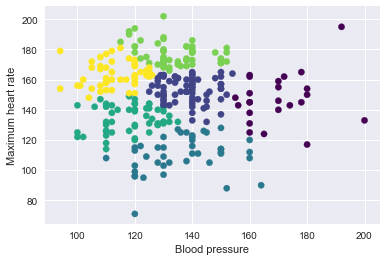

In [15]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=40, cmap='viridis');
plt.xlabel('Blood pressure')
plt.ylabel('Maximum heart rate')
plt.show()